# Import Labraries  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load And Clean Data

In [10]:
# Load dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\TCS_stock_history.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")
df.set_index('Date', inplace=True)

# Print summary
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2002-08-12 to 2021-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4463 non-null   float64
 1   High          4463 non-null   float64
 2   Low           4463 non-null   float64
 3   Close         4463 non-null   float64
 4   Volume        4463 non-null   int64  
 5   Dividends     4463 non-null   float64
 6   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 278.9 KB
None
              Open         High          Low        Close        Volume  \
count  4463.000000  4463.000000  4463.000000  4463.000000  4.463000e+03   
mean    866.936239   876.675013   856.653850   866.537398  3.537876e+06   
std     829.905368   838.267104   821.233477   829.611313  3.273531e+06   
min      24.146938    27.102587    24.146938    26.377609  0.000000e+00   
25%     188.951782   191.571816   185.979417   188.594620

# Exploratory Data Analysis

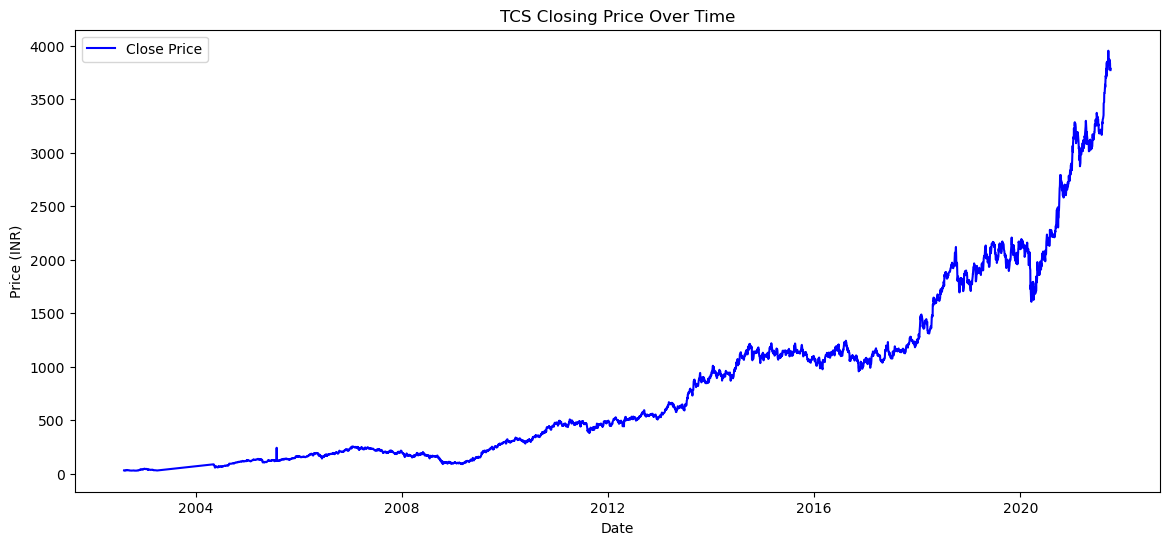

In [13]:
# Plot closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title("TCS Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

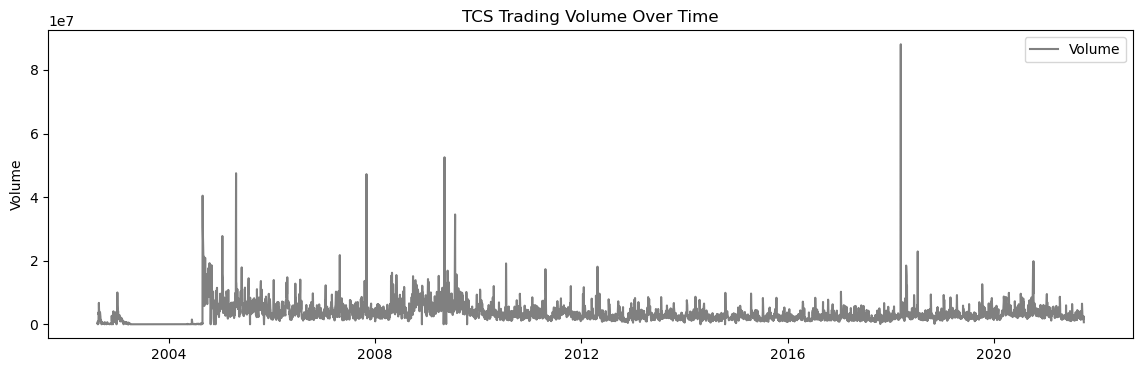

In [15]:
# Volume plot
plt.figure(figsize=(14, 4))
plt.plot(df['Volume'], label='Volume', color='gray')
plt.title("TCS Trading Volume Over Time")
plt.ylabel("Volume")
plt.legend()
plt.show()

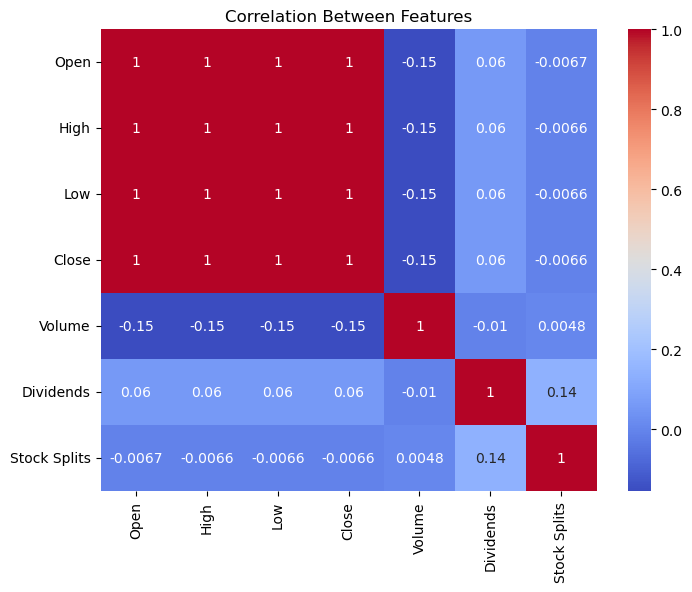

In [17]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

# Time Series Decomposition

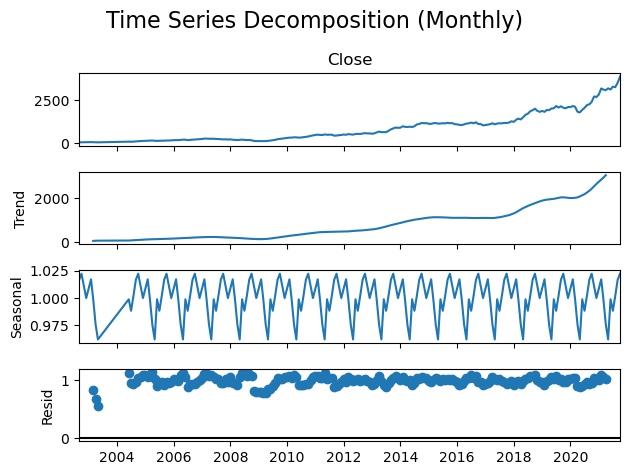

In [20]:
monthly_df = df['Close'].resample('ME').mean()

# Drop missing values
monthly_df = monthly_df.dropna()

# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_df, model='multiplicative', period=12)

# Plot decomposition
decomposition.plot()
plt.suptitle('Time Series Decomposition (Monthly)', fontsize=16)
plt.tight_layout()
plt.show()

# Feature Engineering

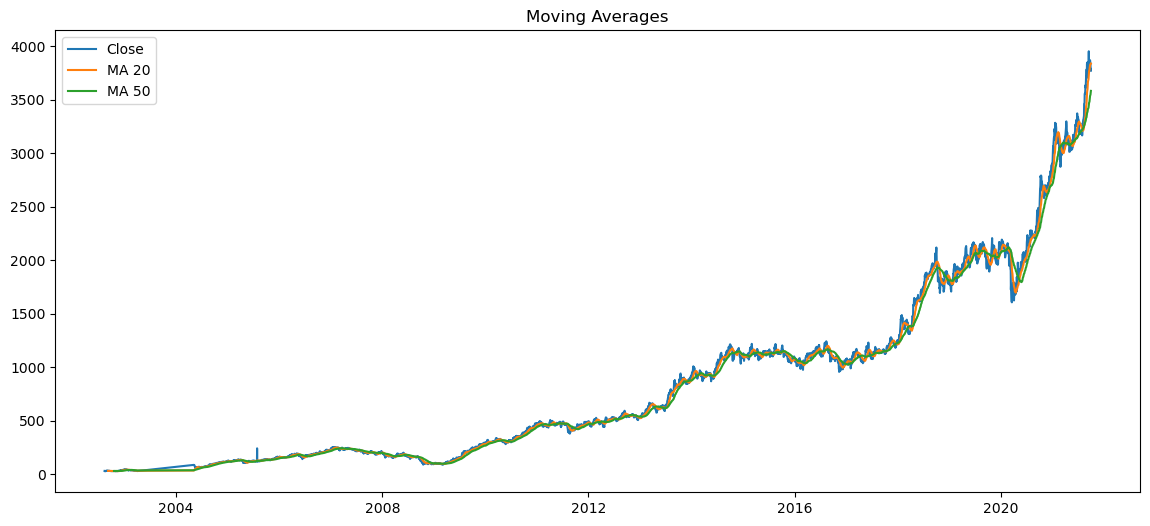

In [23]:
# Create moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_20'], label='MA 20')
plt.plot(df['MA_50'], label='MA 50')
plt.title('Moving Averages')
plt.legend()
plt.show()


# Machine Learning – Linear Regression

In [26]:
# Create lag features
df['Target'] = df['Close'].shift(-1)
ml_df = df.dropna()[['Open', 'High', 'Low', 'Volume', 'Close', 'Target']]

In [ ]:
# Create lag features
df['Target'] = df['Close'].shift(-1)
ml_df = df.dropna()[['Open', 'High', 'Low', 'Volume', 'Close', 'Target']]

# Train-test split
X = ml_df.drop('Target', axis=1)
y = ml_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.show()

In [28]:
# Train-test split
X = ml_df.drop('Target', axis=1)
y = ml_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9960861721089388
RMSE: 37.04032300567459


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


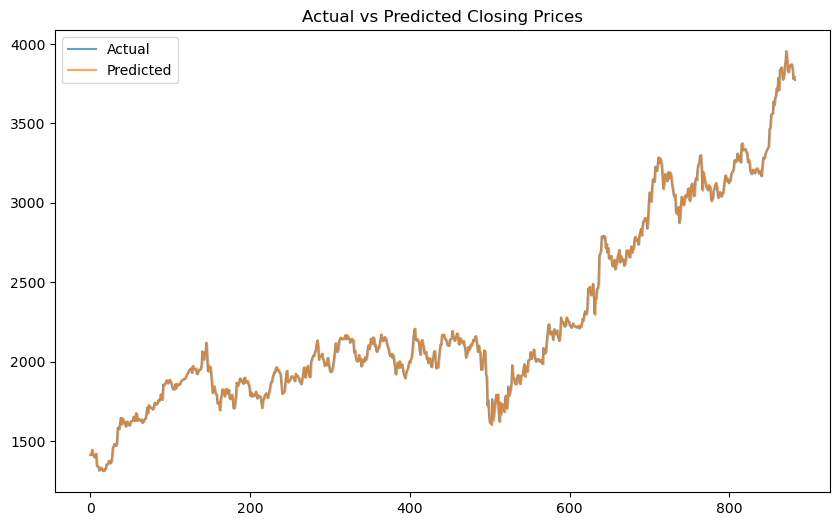

In [36]:
# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.show()